In [1]:
#Paste the training inage in the same folder where you have your .ipynb file
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
 dataset=tf.keras.preprocessing.image_dataset_from_directory(
     "PlantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
 )

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

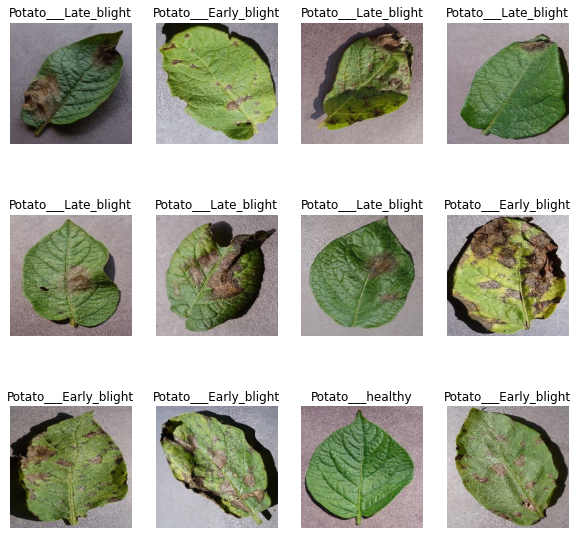

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):#dataset.take(1) takes 1 batch only
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis("off")

In [7]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds=dataset.take(54)

In [9]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [19]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
n_classes=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (32, 60, 60, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 172s 3s/step - loss: 0.9070 - accuracy: 0.4954 - val_loss: 0.8295 - val_accuracy: 0.7604
Epoch 2/50
54/54 [==============================] - 101s 2s/step - loss: 0.7186 - accuracy: 0.6834 - val_loss: 0.5169 - val_accuracy: 0.7969
Epoch 3/50
54/54 [==============================] - 105s 2s/step - loss: 0.4492 - accuracy: 0.8073 - val_loss: 0.3651 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 101s 2s/step - loss: 0.3180 - accuracy: 0.8628 - val_loss: 0.4459 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 101s 2s/step - loss: 0.2559 - accuracy: 0.9045 - val_loss: 0.5453 - val_accuracy: 0.7604
Epoch 6/50
54/54 [==============================] - 102s 2s/step - loss: 0.1849 - accuracy: 0.9259 - val_loss: 0.0945 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 105s 2s/step - loss: 0.1910 - accuracy: 0.9253 - val_loss: 0.1234 - val_accuracy: 0.9323
Epoch 8/50
54

In [29]:
print("Total time taken to train the model: ",4772/60,"minutes or",4772/3600,"hours.")

Total time taken to train the model:  79.53333333333333 minutes or 1.3255555555555556 hours


In [30]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 315ms/step - loss: 0.0282 - accuracy: 0.9922


In [31]:
scores

[0.02820778451859951, 0.9921875]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
acc=history.history['accuracy']
val_acc=history.history["val_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Trainig and Validation Accuracy')

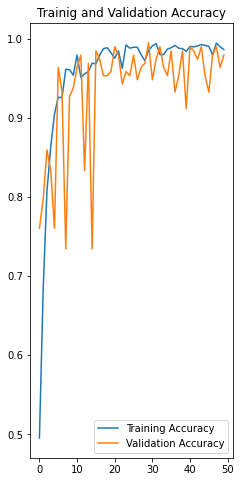

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Trainig and Validation Accuracy")

Text(0.5, 1.0, 'Trainig and Validation loss')

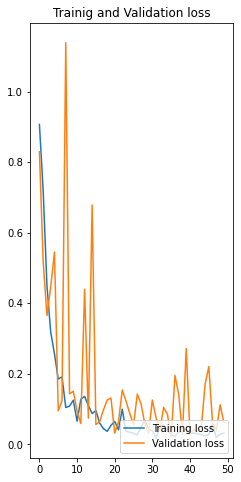

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc='lower right')
plt.title("Trainig and Validation loss")

First image to predict: 
Actual_label:  Potato___Late_blight
Predited label:  Potato___Late_blight


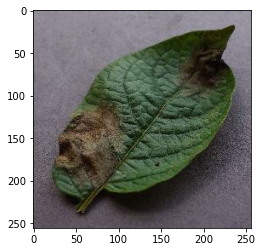

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    
    print("First image to predict: ")
    plt.imshow(first_image)
    print("Actual_label: ",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("Predited label: ",class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #Create a batch
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

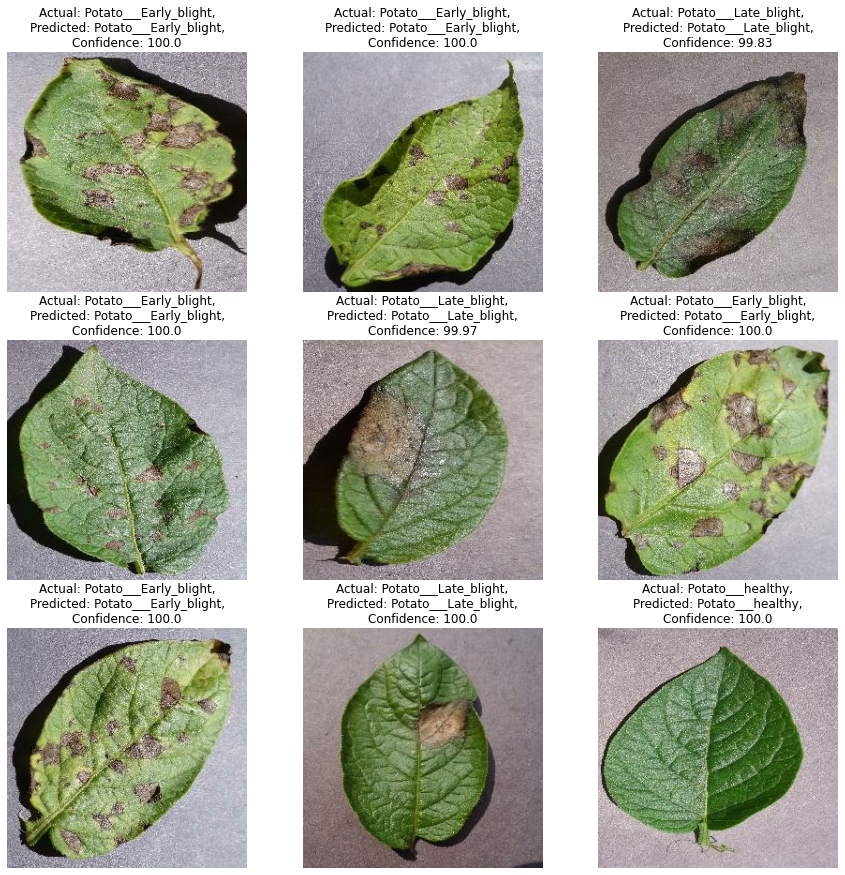

In [53]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}")
        plt.axis("off")
        
                                 

In [54]:
model_version=1
##import os
##model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../models/1\assets


## Convertinf model to tflite

In [7]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(f"../saved_models/1") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)